In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
class MLR:
    def __init__(self,learning_rate=0.005,epochs=3000,l_lamda=0.01):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.l_lamda=l_lamda
        self.weights=None
        self.bias=None
        self.loss_history=[]
    
    def softmax(self,z):
        exp_z=np.exp(z-np.max(z,axis=1,keepdims=True))
        return exp_z/np.sum(exp_z,axis=1,keepdims=True)
    
    def cross_entropy_loss(self,y_true,y_pred):
        m=y_true.shape[0]
        return -np.sum(y_true*np.log(y_pred+1e-9))/m  
    
    def one_hot_encode(self,y,num_classes):
        m=y.shape[0]
        y_encoded=np.zeros((m,num_classes))
        y_encoded[np.arange(m),y]=1
        return y_encoded
    
    # def fit(self,x,y):
    #     m, n = x.shape
    #     num_classes=len(np.unique(y))
    #     y_encoded=self.one_hot_encode(y,num_classes)
        
    #     np.random.seed(42)
    #     self.weights=np.random.randn(n,num_classes)*0.01
    #     self.bias=np.zeros((1,num_classes))
        
    #     for epoch in range(self.epochs):
    #         output=np.dot(x,self.weights)+self.bias
    #         y_pred=self.softmax(output)
            
    #         dw=(np.dot(x.T,(y_pred-y_encoded))/m)+(self.l_lamda*self.weights)
    #         db=np.sum(y_pred-y_encoded,axis=0,keepdims=True)/m
            
    #         self.weights-=self.learning_rate*dw
    #         self.bias-=self.learning_rate*db
            
    #         if epoch%100==0:
    #             loss=self.cross_entropy_loss(y_encoded,y_pred)
    #             print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def fit(self, x, y):
        m, n = x.shape
        num_classes = len(np.unique(y))
        y_encoded = self.one_hot_encode(y, num_classes)
        
        np.random.seed(42)
        self.weights = np.random.randn(n, num_classes) * 0.01
        self.bias = np.zeros((1, num_classes))
        
        for epoch in range(self.epochs):
            output = np.dot(x, self.weights) + self.bias
            y_pred = self.softmax(output)
            
            dw = (np.dot(x.T, (y_pred - y_encoded)) / m) + (self.l_lamda * self.weights)
            db = np.sum(y_pred - y_encoded, axis=0, keepdims=True) / m
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            loss = self.cross_entropy_loss(y_encoded, y_pred)
            self.loss_history.append(loss)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    
    
    def predict(self,x):
        output=np.dot(x,self.weights)+self.bias
        y_pred=self.softmax(output)
        return np.argmax(y_pred,axis=1)
    
    def predict_proba(self, x):
        output = np.dot(x, self.weights) + self.bias
        return self.softmax(output)
    
    def plot_loss_curve(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label="Loss", color="blue")
        plt.xlabel("Epochs", fontsize=12, fontweight="bold")
        plt.ylabel("Loss", fontsize=12, fontweight="bold")
        plt.title("Training Loss Curve", fontsize=14, fontweight="bold")
        plt.legend()
        plt.grid()
        plt.show()

    def evaluate_metrics(self, X_test, y_test):
        y_pred = self.predict(X_test)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
        return precision, recall, f1

    def plot_roc_curve(self, X_test, y_test):
        y_score = self.predict_proba(X_test)
        num_classes = y_score.shape[1]

        plt.figure(figsize=(8, 6))
        for i in range(num_classes):
            fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("FALSE POSITIVE RATE (1-Specificity)", fontsize=12, fontweight="bold")
        plt.ylabel("TRUE POSITIVE RATE (Sensitivity)", fontsize=12, fontweight="bold")
        plt.title("ROC Curve Multi-class Logistic Regression", fontsize=14, fontweight="bold")
        plt.legend()
        plt.grid()
        plt.show()

In [36]:
df=pd.read_csv("cleaned.csv")
x=df.drop(columns=["Diabetes_012"]).values
y=df["Diabetes_012"].astype(int).values

In [37]:
print("Class distribution..",np.bincount(y))

Class distribution.. [40000 17559 17559]


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [39]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
model=MLR(learning_rate=0.05,epochs=3000,l_lamda=0.01)
model.fit(x_train,y_train)

Epoch 0, Loss: 1.1072
Epoch 100, Loss: 0.7218
Epoch 200, Loss: 0.6842
Epoch 300, Loss: 0.6711
Epoch 400, Loss: 0.6648
Epoch 500, Loss: 0.6611
Epoch 600, Loss: 0.6587
Epoch 700, Loss: 0.6571
Epoch 800, Loss: 0.6559
Epoch 900, Loss: 0.6551
Epoch 1000, Loss: 0.6545
Epoch 1100, Loss: 0.6540
Epoch 1200, Loss: 0.6536
Epoch 1300, Loss: 0.6533
Epoch 1400, Loss: 0.6531
Epoch 1500, Loss: 0.6529
Epoch 1600, Loss: 0.6527
Epoch 1700, Loss: 0.6526
Epoch 1800, Loss: 0.6525
Epoch 1900, Loss: 0.6524
Epoch 2000, Loss: 0.6523
Epoch 2100, Loss: 0.6523
Epoch 2200, Loss: 0.6522
Epoch 2300, Loss: 0.6522
Epoch 2400, Loss: 0.6522
Epoch 2500, Loss: 0.6521
Epoch 2600, Loss: 0.6521
Epoch 2700, Loss: 0.6521
Epoch 2800, Loss: 0.6521
Epoch 2900, Loss: 0.6520


In [41]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)*100
print(f"Model Accuracy :{accuracy:.4f} %")

Model Accuracy :75.3195 %


In [42]:
print(np.unique(y_pred))
print(y_pred.shape)

[0 1 2]
(15024,)


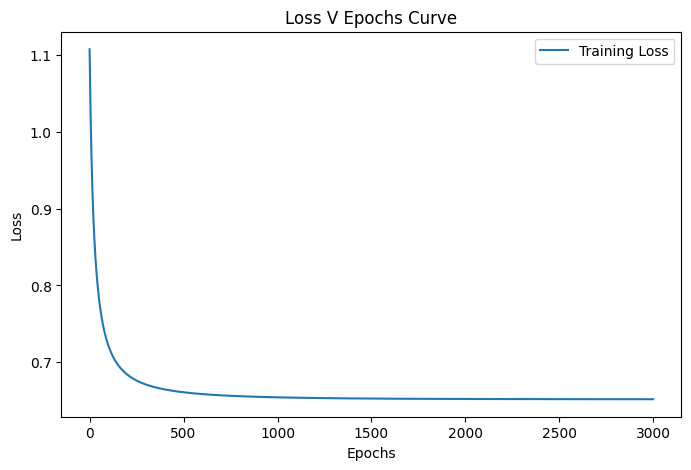

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(model.loss_history,label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss V Epochs Curve")
plt.legend()
plt.show()

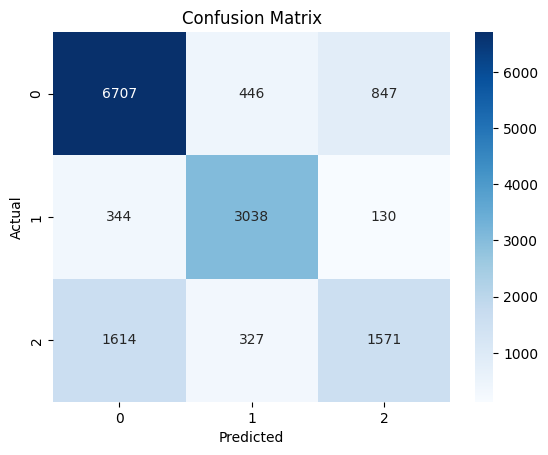

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
import seaborn as sns

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test,y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      8000
           1       0.80      0.87      0.83      3512
           2       0.62      0.45      0.52      3512

    accuracy                           0.75     15024
   macro avg       0.73      0.72      0.72     15024
weighted avg       0.74      0.75      0.74     15024



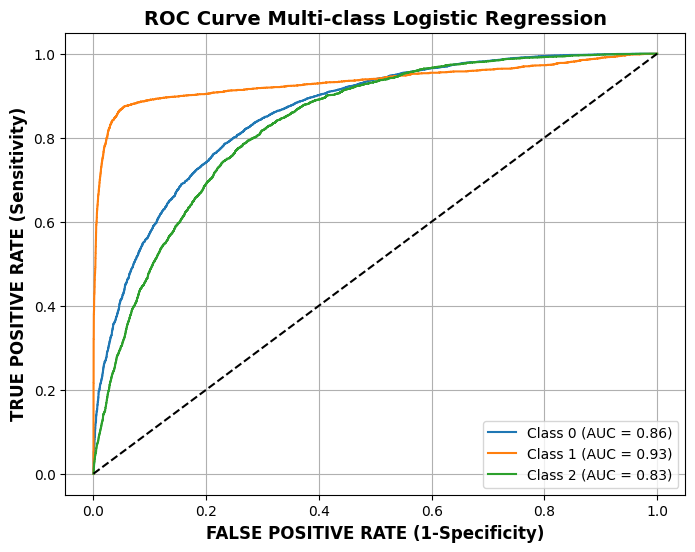

In [46]:
model.plot_roc_curve(x_test,y_test)